In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.datasets import make_blobs

scaler = StandardScaler()
model = KMeans()

In [2]:
movies = pd.read_csv('./ml-latest/movies.csv')
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [3]:
genres = movies.genres.str.get_dummies()
genres

all_movies = pd.concat([movies, genres], axis=1)
all_movies.head()

,movieId,title,genres,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),Adventure|Children|Fantasy,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),Comedy|Romance,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II (1995),Comedy,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
scaled_genres = scaler.fit_transform(genres)
scaled_genres

array([[-0.28150763, -0.37402098,  3.64488992, ..., -0.40584321,
        -0.17983175, -0.15586783],
       [-0.28150763, -0.37402098,  3.64488992, ..., -0.40584321,
        -0.17983175, -0.15586783],
       [-0.28150763, -0.37402098, -0.27435671, ..., -0.40584321,
        -0.17983175, -0.15586783],
       ...,
       [-0.28150763, -0.37402098, -0.27435671, ..., -0.40584321,
        -0.17983175, -0.15586783],
       [-0.28150763, -0.37402098,  3.64488992, ..., -0.40584321,
        -0.17983175, -0.15586783],
       [-0.28150763,  2.67364678, -0.27435671, ..., -0.40584321,
        -0.17983175, -0.15586783]])

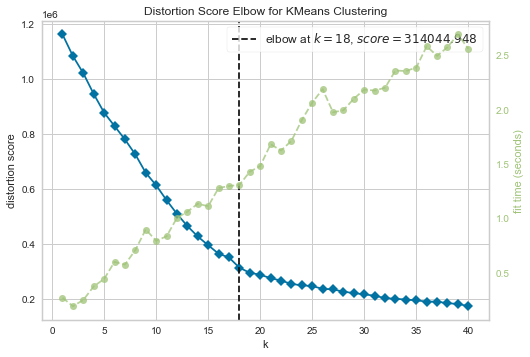

In [5]:
visualizer = KElbowVisualizer(model, k=(1, 41))
visualizer.fit(scaled_genres)
visualizer.show()

# #elbow at 17

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000028700064910>,
      dtype=object)

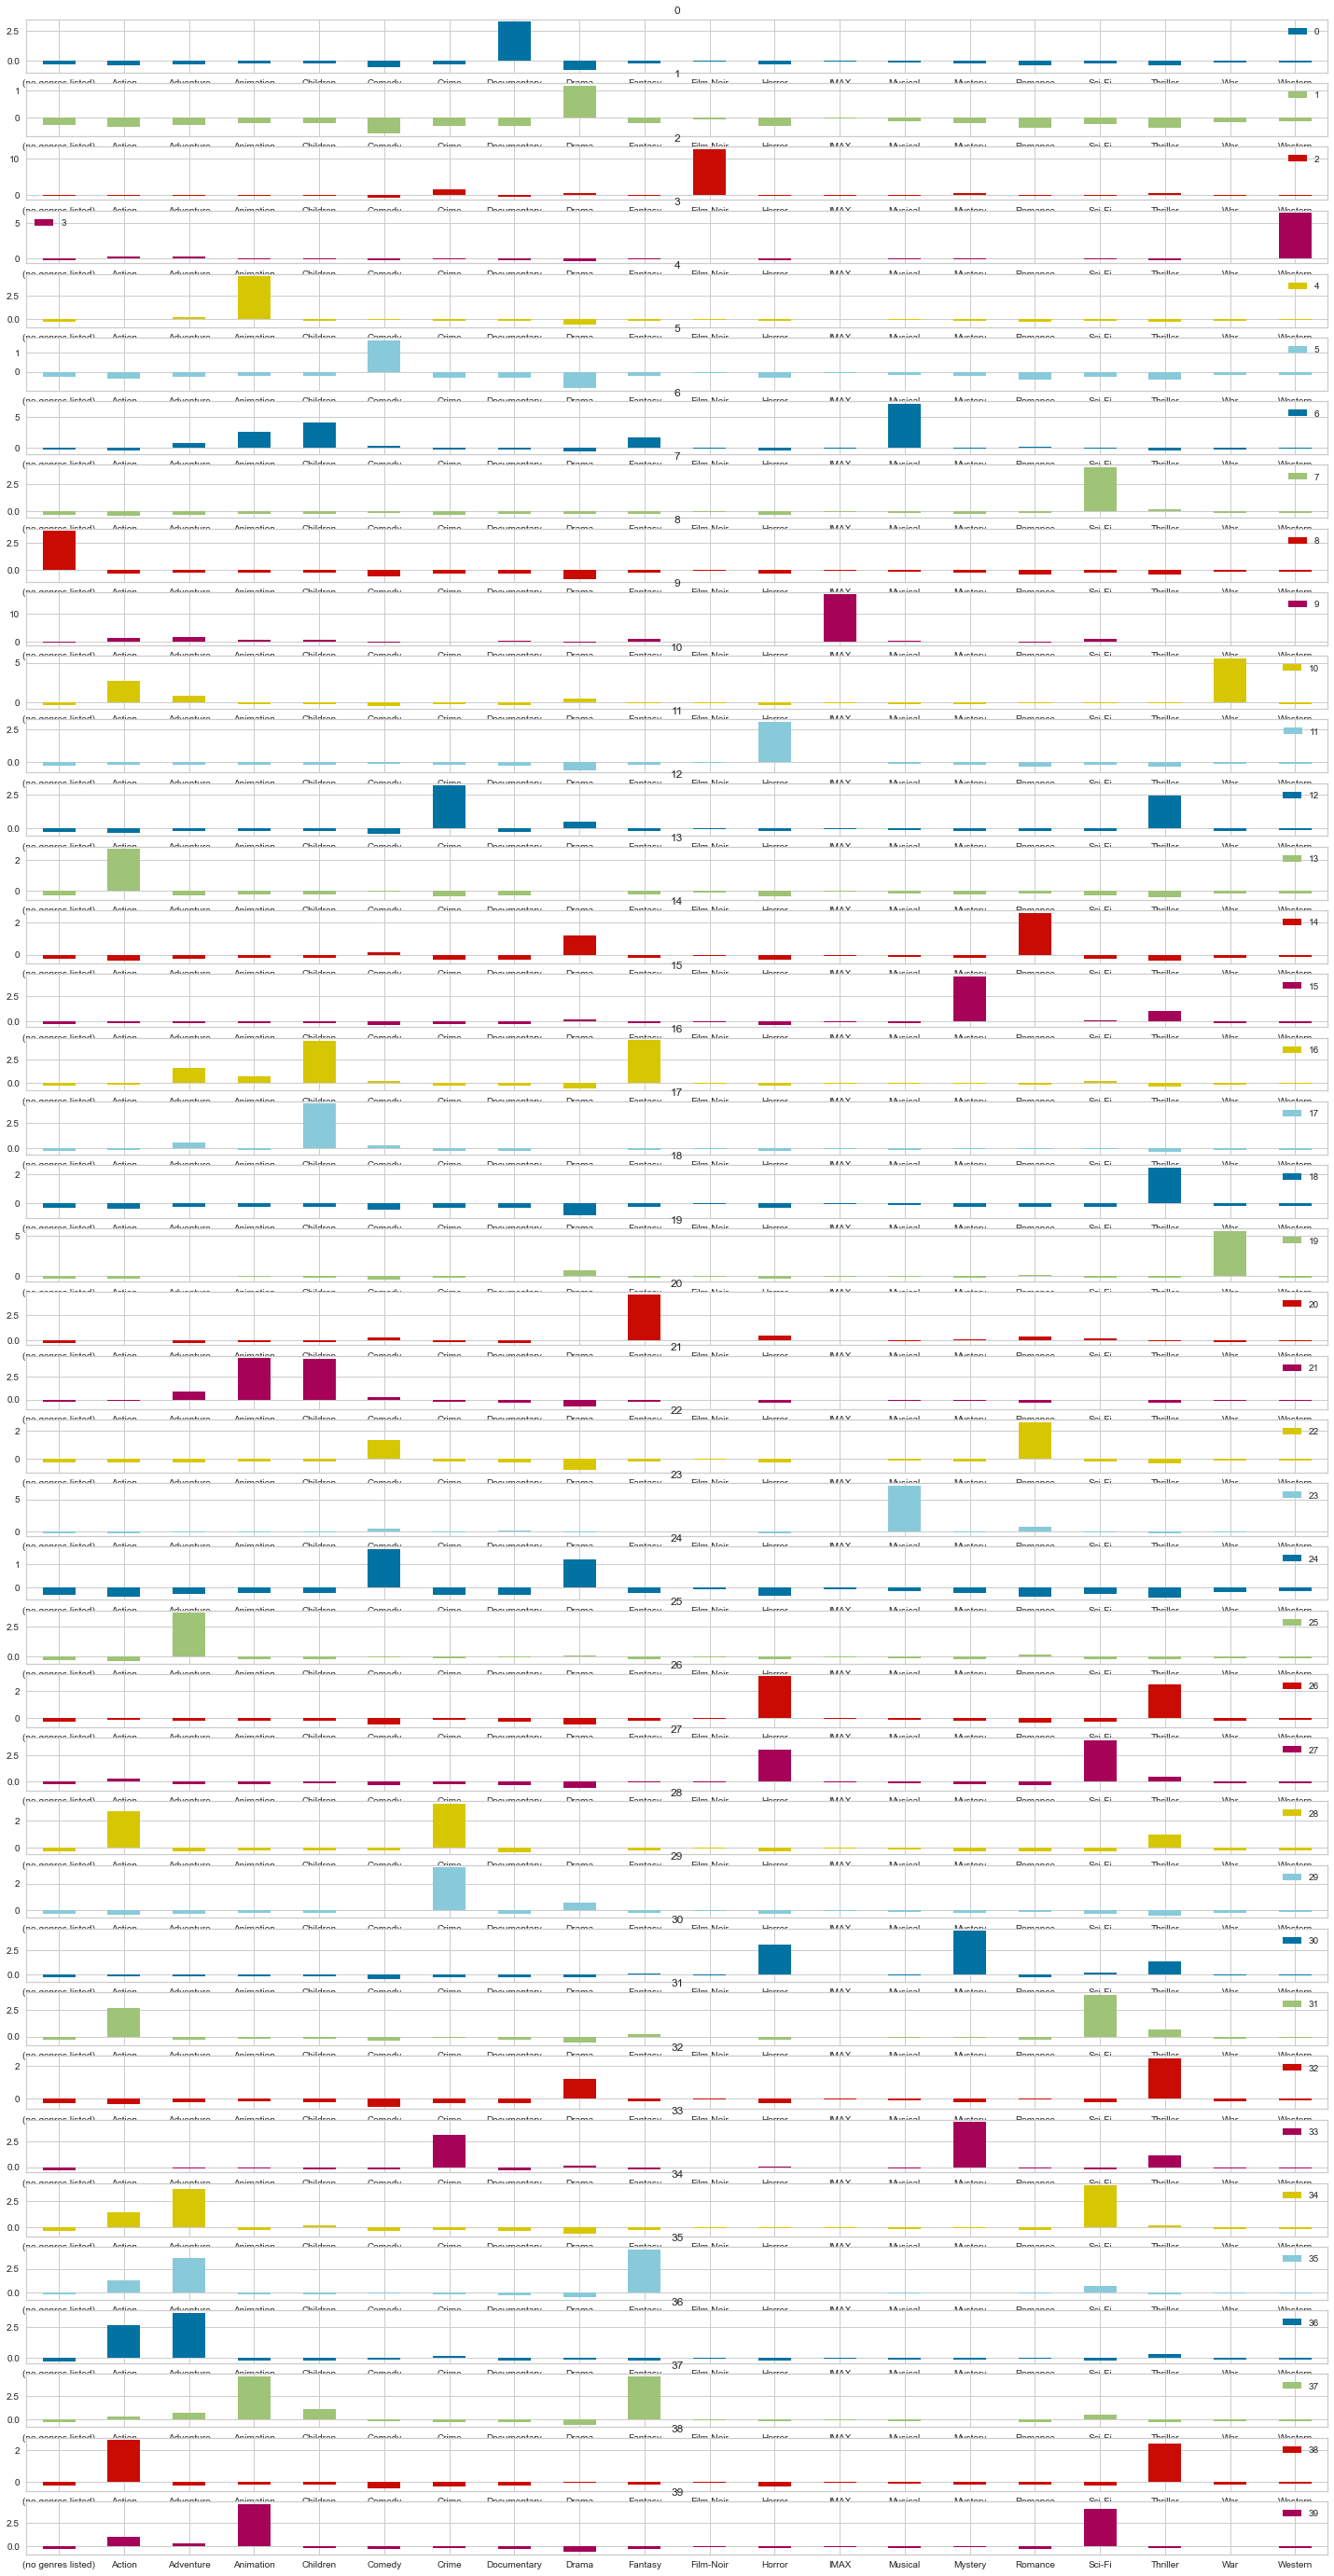

In [6]:
groups = pd.DataFrame(model.cluster_centers_, columns=genres.columns)
groups.transpose().plot.bar(subplots=True,
               figsize=(25, 50),
               sharex=False,
               rot=0)

In [7]:
groups = model.labels_

movies_groups = pd.DataFrame(data=groups, columns={"groups"})

In [8]:
final_movies = pd.concat([movies, movies_groups], axis = 1)
final_movies

,movieId,title,genres,groups
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,16
1,2,Jumanji (1995),Adventure|Children|Fantasy,16
2,3,Grumpier Old Men (1995),Comedy|Romance,22
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,14
4,5,Father of the Bride Part II (1995),Comedy,5
...,...,...,...,...
58093,193876,The Great Glinka (1946),(no genres listed),8
58094,193878,Les tribulations d'une caissière (2011),Comedy,5
58095,193880,Her Name Was Mumu (2016),Drama,1
58096,193882,Flora (2017),Adventure|Drama|Horror|Sci-Fi,34


In [20]:
class sugest:
    def select_movie(self, title):
        selected_movie = final_movies.query('title == "{test}"'.format(test=title))
        self.selected_group = int(selected_movie.groups)
        print(selected_group)
    
    def suggestions(self):
        test = final_movies.query("groups == '{group}'".format(group=self.selected_group))
        print(test)    

In [22]:
s = sugest()
s.select_movie("Toy Story (1995)")
s.suggestions()

0
       movieId                                 title  \
0            1                      Toy Story (1995)   
1            2                        Jumanji (1995)   
55          56        Kids of the Round Table (1995)   
59          60    Indian in the Cupboard, The (1995)   
124        126     NeverEnding Story III, The (1994)   
...        ...                                   ...   
57809   193205  The Cave of the Golden Rose 2 (1992)   
57819   193231  The Cave of the Golden Rose 3 (1993)   
57860   193333  The Cave of the Golden Rose 4 (1994)   
57890   193403               A Talking Cat!?! (2013)   
57945   193539  The Cave of the Golden Rose 5 (1996)   

                                            genres  groups  
0      Adventure|Animation|Children|Comedy|Fantasy      16  
1                       Adventure|Children|Fantasy      16  
55               Adventure|Children|Comedy|Fantasy      16  
59                      Adventure|Children|Fantasy      16  
124                 